### Importing library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv file

In [2]:
df = pd.read_csv('Phishing Data.csv')

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [4]:
df.shape

(2456, 31)

In [5]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Splitting the training and testing data


In [6]:
# we are going to seperate the inputs and the output from the dataset

y = df['Result'] 
x = df.drop('Result',axis=1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

### Now we are going to apply few algorithms as follows to select the best model:
1. Decision tree algorithm
2. Logistic Regression algorithm
3. Random Forest Classifier
4. K Neighbors Classifier

### Applying Decision tree algorithm on the given train and test dataset
Decision tree is used to build regression or classification model in the form of tree structure.

In [8]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(x_train,y_train)

In [9]:
y_pred1 = decision_tree_model.predict(x_test)
acc1 = accuracy_score(y_pred1,y_test)*100
acc1

95.9349593495935

In [10]:
cm1 = confusion_matrix(y_test, y_pred1) 
cm1

array([[251,   6],
       [ 14, 221]], dtype=int64)

In [11]:
total1 = cm1[0][0]+cm1[0][1]+cm1[1][0]+cm1[1][1]
total_false1 = cm1[0][1]+cm1[1][0]
error_rate1 = total_false1/total1*100
error_rate1

4.0650406504065035

### Finding feature importances of Decision tree model

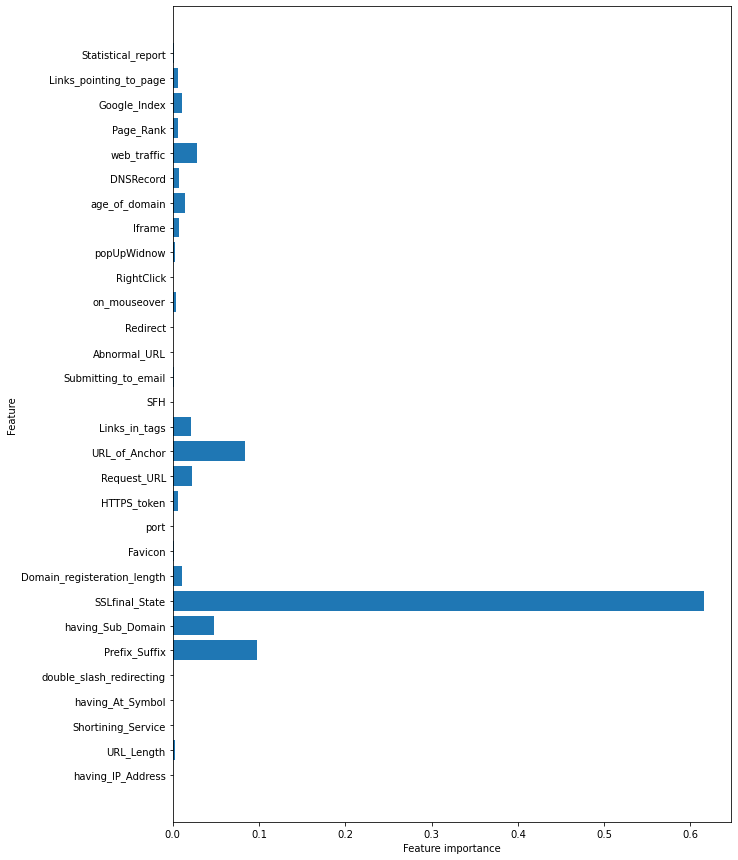

In [12]:
plt.figure(figsize=(10,15))
n_features = x_train.shape[1]
plt.barh(range(n_features), decision_tree_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Applying Logistic Regression algorithm on the given train and test dataset
Logistic Regression measures the relationship between dependent and independent variable when the dependent variable is catagorical in nature.

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model = logistic_regression_model.fit(x_train,y_train)

In [14]:
y_pred2 = logistic_regression_model.predict(x_test)
acc2 = accuracy_score(y_pred2,y_test)*100
acc2

93.90243902439023

In [15]:
cm2 = confusion_matrix(y_test, y_pred2) 
cm2

array([[243,  14],
       [ 16, 219]], dtype=int64)

In [16]:
total2 = cm2[0][0]+cm2[0][1]+cm2[1][0]+cm2[1][1]
total_false2 = cm2[0][1]+cm2[1][0]
error_rate2 = total_false2/total2*100
error_rate2

6.097560975609756

### Applying Random Forest Classifier algorithm on the given train and test dataset
It is based on Bagging ensemble technique that contains a set of decision trees and the output is the average of all the decision trees.

In [17]:
from sklearn.ensemble import RandomForestClassifier 

random_forest_classifier_model = RandomForestClassifier()  
random_forest_classifier_model.fit(x_train, y_train)  

RandomForestClassifier()

In [18]:
y_pred3 = random_forest_classifier_model.predict(x_test)
acc3 = accuracy_score(y_pred3,y_test)*100
acc3

97.35772357723577

In [19]:
cm3 = confusion_matrix(y_test, y_pred3) 
cm3

array([[252,   5],
       [  8, 227]], dtype=int64)

In [20]:
total3 = cm3[0][0]+cm3[0][1]+cm3[1][0]+cm3[1][1]
total_false3 = cm3[0][1]+cm3[1][0]
error_rate3 = total_false3/total3*100
error_rate3

2.642276422764228

### Finding feature importances of Random Forest Classifier model

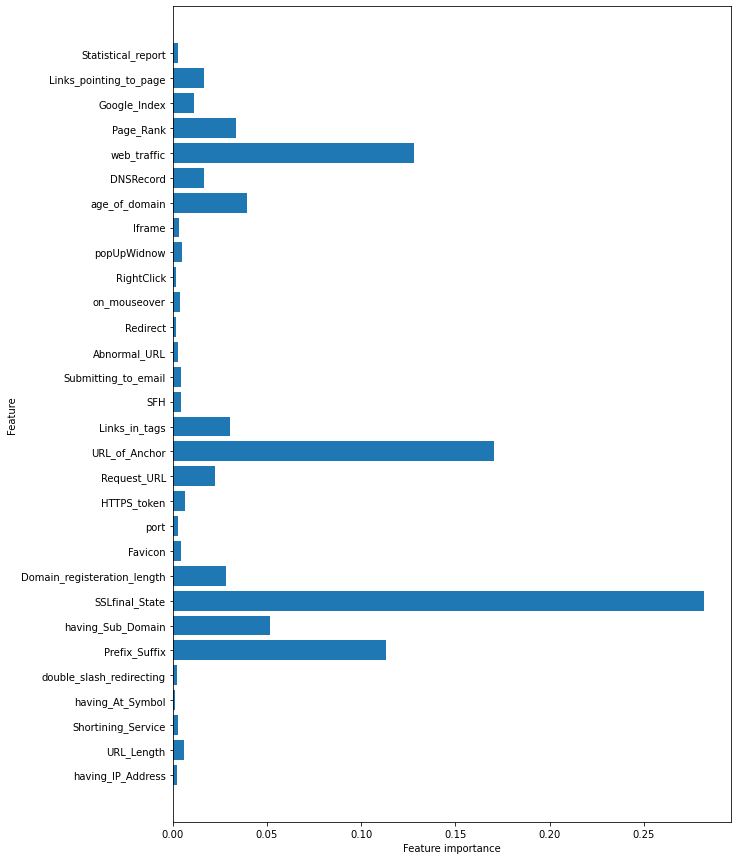

In [21]:
plt.figure(figsize=(10,15))
n_features = x_train.shape[1]
plt.barh(range(n_features), random_forest_classifier_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Applying K Neighbors Classifier algorithm on the given train and test dataset
K Neighbors Classifier takes all the data and classifies a new data based on the similarity among data.

In [22]:
from sklearn.neighbors import KNeighborsClassifier  
KNeighbors_classifier= KNeighborsClassifier()  
KNeighbors_classifier = KNeighbors_classifier.fit(x_train, y_train)  

In [23]:
y_pred4 = KNeighbors_classifier.predict(x_test)
acc4 = accuracy_score(y_pred4,y_test)*100
acc4

94.51219512195121

In [24]:
cm4 = confusion_matrix(y_test, y_pred4) 
cm4

array([[246,  11],
       [ 16, 219]], dtype=int64)

In [25]:
total4 = cm4[0][0]+cm4[0][1]+cm4[1][0]+cm4[1][1]
total_false4 = cm4[0][1]+cm4[1][0]
error_rate4 = total_false4/total4*100
error_rate4

5.487804878048781

### Comparing the results

In [26]:
results = pd.DataFrame({ 'ML Model': ['Decision tree algorithm','Logistic Regression algorithm','Random Forest Classifier',
'K Neighbors Classifier'],    
    'Accuracy score': [acc1,acc2,acc3,acc4],
    'Error Rate': [error_rate1,error_rate2,error_rate3,error_rate4]})
results

,ML Model,Accuracy score,Error Rate
0,Decision tree algorithm,95.934959,4.065041
1,Logistic Regression algorithm,93.902439,6.097561
2,Random Forest Classifier,97.357724,2.642276
3,K Neighbors Classifier,94.512195,5.487805


### From the above calculations we can say that Random Forest Classifier algorithm is the best fit for the given dataset 

### The reason why we selected Random Forest Classifier:
1. It has the highest accuracy 
2. It has the Lowest error rate
3. It is a bagging(parallel) ensemble technique
4. It is useful for determining feature importance easily

Ensemble technique is used for combining multiple models to obtain better results.

### Saving Random Forest Classifier model for future deployment

In [27]:
import pickle
pickle.dump(random_forest_classifier_model, open("model.pkl", "wb"))